<a href="https://colab.research.google.com/github/umakantiiit/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction_In_ANN_and_Lazyclassifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 9.41MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/heart-failure-clinical-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [6]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [8]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
x


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [15]:
x

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [17]:
!pip install lazypredict

In [18]:
from lazypredict.Supervised import LazyClassifier

In [19]:
clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 23.78it/s]

[LightGBM] [Info] Number of positive: 71, number of negative: 168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 302
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297071 -> initscore=-0.861284
[LightGBM] [Info] Start training from score -0.861284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Text(0, 0, '203'), Text(0, 0, '96')]

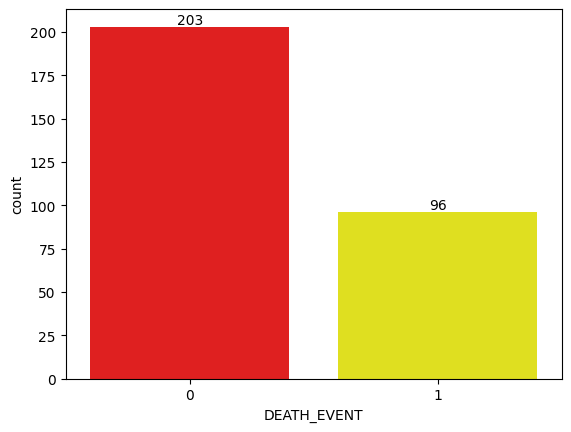

In [20]:
colors=['red','yellow']
ax=sns.countplot(df,x='DEATH_EVENT',palette=colors)
ax.bar_label(ax.containers[0])

In [21]:
#Reason for low accuracy is class inbalance. So, we have to use either upsampling or downsampling technique to resolve this.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)
x_ros,y_ros = ros.fit_resample(x,y)

In [22]:
print(x_ros.shape)

(406, 12)


In [23]:
print(y_ros.shape)

(406,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x_ros)

In [27]:
x_ros.shape

(406, 12)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

In [29]:
clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 25.18it/s]

[LightGBM] [Info] Number of positive: 162, number of negative: 162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

LET'S TRY WITH ANN . RANDOM FOREST CLASSIFIER GIVES 90 PERCENT ACCURACY IN THIS DATASET.

In [37]:
model=Sequential()
import keras

# lets Create the layers

model.add(Dense(units=128,kernel_initializer='uniform',activation=keras.layers.LeakyReLU(alpha=0.01),input_dim=12))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dropout(0.3))
model.add(Dense(units=64,kernel_initializer='uniform',activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dropout(0.3))
model.add(Dense(units=32,kernel_initializer='uniform',activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dropout(0.3))
model.add(Dense(units=16,kernel_initializer='uniform',activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dropout(0.3))
model.add(Dense(units=8,kernel_initializer='uniform',activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train,Y_train,batch_size=25,epochs=50,validation_split=0.25)

Epoch 1/50
10/10 [==============================] - 4s 40ms/step - loss: 0.6934 - accuracy: 0.4856 - val_loss: 0.6932 - val_accuracy: 0.4691
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6923 - accuracy: 0.5926 - val_loss: 0.6932 - val_accuracy: 0.4691
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6908 - accuracy: 0.6337 - val_loss: 0.6932 - val_accuracy: 0.4691
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6865 - accuracy: 0.7407 - val_loss: 0.6932 - val_accuracy: 0.4691
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6799 - accuracy: 0.7572 - val_loss: 0.6932 - val_accuracy: 0.4691
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6708 - accuracy: 0.7407 - val_loss: 0.6929 - val_accuracy: 0.4938
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.8230 - val_loss: 0.6919 - val_accuracy: 0.7531
Epoch 8/50
10/

In [39]:
history=pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.69,0.49,0.69,0.47
1,0.69,0.59,0.69,0.47
2,0.69,0.63,0.69,0.47
3,0.69,0.74,0.69,0.47
4,0.68,0.76,0.69,0.47


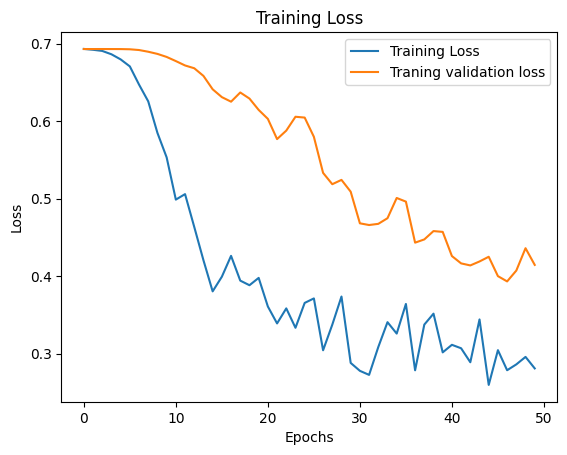

In [40]:
plt.plot(history['loss'],label='Training Loss')
plt.plot(history['val_loss'],label='Traning validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

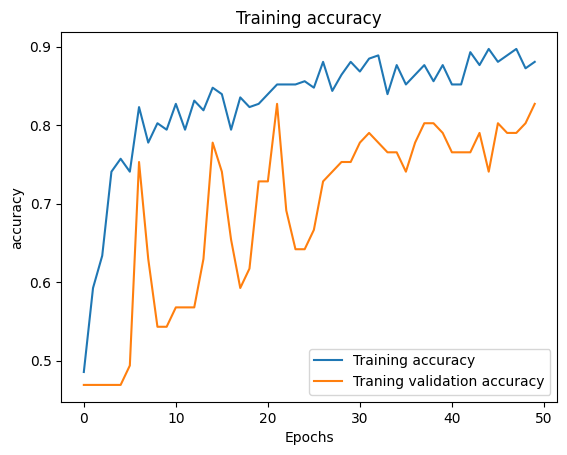

In [41]:
plt.plot(history['accuracy'],label='Training accuracy')
plt.plot(history['val_accuracy'],label='Traning validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')

In [42]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.4
np.set_printoptions()

3/3 [==============================] - 0s 5ms/step


In [45]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report

Text(0.5, 1.0, 'Confustion matrix')

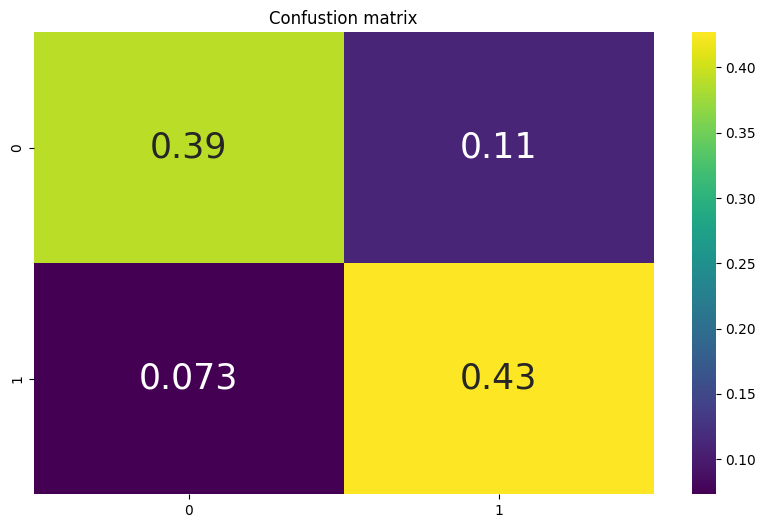

In [44]:
cf_matrix=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap='viridis',annot=True,annot_kws={'size':25})
plt.title('Confustion matrix')

In [46]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.80      0.85      0.82        41

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82

